<a href="https://colab.research.google.com/github/AndreSimao-alms/Tratamento-de-dados---POU/blob/main/Tratamento_de_dados_POU" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importando bibliotecas**
- Pandas
- Matplotlib 
- Numpy

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

### **Leitura dos dados**

In [10]:
df = pd.read_excel('Cópia de dados2.xlsx')

In [11]:
df

,Massa do balde,Temperatura da água,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Kg,oC,NaN,NaN,NaN,NaN
1,1.2,27.5,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Pressão,NaN
4,Medida,Réplica,Balde + água,Tempo,vacuômetro,manômetro
5,-,-,Kg,s,inHg,Kgf/cm2
6,1,1,11,11.1,4,1
7,2,2,11.3,11.48,NaN,NaN
8,3,3,11.4,10.53,NaN,NaN
9,4,1,11.15,11.534,3.5,1.05


In [12]:
df.info

<bound method DataFrame.info of    Massa do balde Temperatura da água  ...  Unnamed: 4 Unnamed: 5
0              Kg                  oC  ...         NaN        NaN
1             1.2                27.5  ...         NaN        NaN
2             NaN                 NaN  ...         NaN        NaN
3             NaN                 NaN  ...     Pressão        NaN
4          Medida             Réplica  ...  vacuômetro  manômetro
5               -                   -  ...        inHg    Kgf/cm2
6               1                   1  ...           4          1
7               2                   2  ...         NaN        NaN
8               3                   3  ...         NaN        NaN
9               4                   1  ...         3.5       1.05
10              5                   2  ...         NaN        NaN
11              6                   3  ...         NaN        NaN
12              7                   1  ...           3        1.1
13              8                   2  ...  

In [13]:
df['Massa do balde']

0         Kg
1        1.2
2        NaN
3        NaN
4     Medida
5          -
6          1
7          2
8          3
9          4
10         5
11         6
12         7
13         8
14         9
15        10
16        11
17        12
18        13
Name: Massa do balde, dtype: object

### Limpando bancos de dados e editando linhas e colunas 

In [14]:
df = df.iloc[range(6,19)]

In [15]:
df.index

Int64Index([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')

In [16]:
df = df.rename(columns = {'Massa do balde': 'Medida'}) 

In [17]:
df = df.rename(columns = {'Temperatura da água':'Réplica'})

In [18]:
df = df.rename(columns = {'Unnamed: 2':'Balde+H20 (Kg)'})

In [19]:
df = df.rename(columns = {'Unnamed: 3':'Tempo (s)'})

In [20]:
df = df.rename(columns = {'Unnamed: 4': 'Vac (inHg)'})

In [21]:
df = df.rename(columns = {'Unnamed: 5': 'Man (Kfg/cm2)'})

### **Selecionando valores pressão**

In [73]:
filtro_vac = df['Vac (inHg)'].isnull()
vac = df[~filtro_vac]['Vac (inHg)'] # Valores de Vac separados
vac

6       4
9     3.5
12      3
15      2
18      0
Name: Vac (inHg), dtype: object

In [74]:
filtro_Man = df['Man (Kfg/cm2)'].isnull()
Man = df[~filtro_Man]['Man (Kfg/cm2)'] # Valores de Man separados
Man

6        1
9     1.05
12     1.1
15     1.2
18     1.8
Name: Man (Kfg/cm2), dtype: object

### **Massa de água:**
- Subtração da massa do balde

In [51]:
df['Massa H20'] = massa
df

,Medida,Réplica,Tempo (s),Vac (inHg),Man (Kfg/cm2),Massa H20
6,1,1,11.1,4,1,9.8
7,2,2,11.48,NaN,NaN,10.1
8,3,3,10.53,NaN,NaN,10.2
9,4,1,11.534,3.5,1.05,9.95
10,5,2,10.93,NaN,NaN,10.8
11,6,3,10.31,NaN,NaN,9.65
12,7,1,10.9,3,1.1,9.55
13,8,2,11.13,NaN,NaN,9.05
14,9,3,11.09,NaN,NaN,9.6
15,10,1,11,2,1.2,8.7


### **Média das replicatas Massa:** 

In [72]:
i=3
media_m = []
for x in range(0,15,3):  
  medias_m = df[x:i]['Massa H20'].mean().round(3)
  i += 3
  media_m.append(medias_m)

media_m = pd.Series(media_m) 
media_m

0    10.033
1    10.133
2     9.400
3     9.300
4     0.000
dtype: float64

### **Média das replicatas Tempo:** 



In [92]:
media_t = []
x = 3
for i in range(0,15,3):
  medias_t = df[i:x]['Tempo (s)'].mean()
  x += 3 
  media_t.append(medias_t)
media_t

[11.036666666666667,
 10.924666666666667,
 11.040000000000001,
 11.103333333333333,
 nan]

### **Conversão de inHg para Kfg/cm2**

In [26]:
vac_conv = np.array(vac)*0.0345316
vac_conv

array([0.1381264, 0.12086060000000001, 0.10359480000000001, 0.0690632,
       0.0], dtype=object)

In [27]:
df.head()

,Medida,Réplica,Balde+H20 (Kg),Tempo (s),Vac (inHg),Man (Kfg/cm2)
6,1,1,11,11.1,4,1
7,2,2,11.3,11.48,NaN,NaN
8,3,3,11.4,10.53,NaN,NaN
9,4,1,11.15,11.534,3.5,1.05
10,5,2,12,10.93,NaN,NaN


### **Desvio Padrão**

**Massa:**

In [28]:
std_m = media_m.std()
std_m

4.361066005003822

**Tempo:**

In [29]:
media_t = pd.Series(media_t)
std_t = media_t.std()
std_t

0.0742934621519183

**Pressão Vacuômetro:**

In [30]:
std_vac = vac.std()
std_vac

1.5811388300841898

**Pressão Manômetro:**

In [31]:
std_Man = Man.std()
std_Man

0.32710854467592254

### Cálculos (x,y)

#### Eixo y:

- y = H = (Man + Vac) / gama  (m)
- Massa específica da água em 27.5ºC: 996.39 kg/m3




In [84]:
H = ((Man + vac_conv)/ (996.39*9.81))
H

6     0.000116437
9     0.000119786
12    0.000123135
15    0.000129833
18    0.000184151
Name: Man (Kfg/cm2), dtype: object

#### Eixo x:
- x = Q = Volume / tempo (m3/h)

In [93]:
media_t = np.array(media_t)
media_t = media_t/3600
media_t

array([0.00306574, 0.00303463, 0.00306667, 0.00308426,        nan])

In [94]:
media_m = np.array(media_m)
vol_m = media_m/996.39
vol_m

array([0.01006935, 0.01016971, 0.00943406, 0.00933369, 0.        ])

In [129]:
# Vazão volumétrica
Q = vol_m/media_t
Q = pd.Series(Q)
Q.fillna(0,inplace=True)
Q

0    3.284476
1    3.351220
2    3.076323
3    3.026235
4    0.000000
dtype: float64

### Plotagem do gráfico

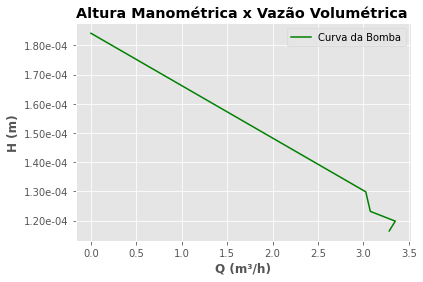

In [138]:
fig, ax = plt.subplots()
plt.style.use('ggplot')
plt.title('Altura Manométrica x Vazão Volumétrica', loc='left', fontweight='black', family='cursive')
plt.ylabel('H (m)',fontweight='black')
plt.xlabel('Q (m³/h)',fontweight='black')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.plot(Q,H,color='green', label='Curva da Bomba')
plt.legend()
plt.savefig('GráficoPython.png')
plt.savefig('GráficoPython.pdf')